In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Complex hypotheses

Sometimes we have data that simply does not fit simple, linear hypotheses. When this happens, it is very likely that we will suffer **underfitting**, since a too simple functional form of a hypothesis may not be able to capture the behavior of a more complex theoretical function $\mathcal{F}$, as reflected by the sample. In these cases, the simple solution is to implement more complex hypotheses.

To begin our study, we will use very simple data from sklearn itself (submodule [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)):


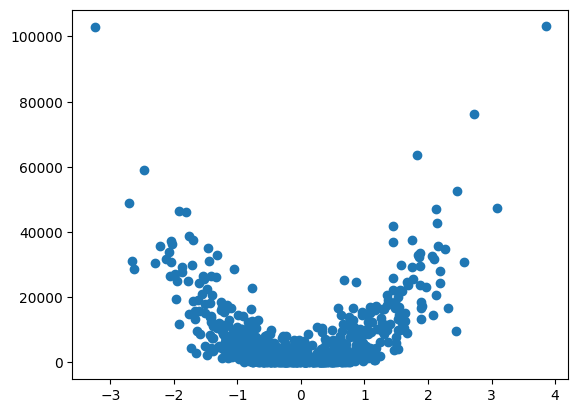

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show();

Intercept (b0): 7279.765399809274
Angular coefficient: [1303.44379459]

Trained model:


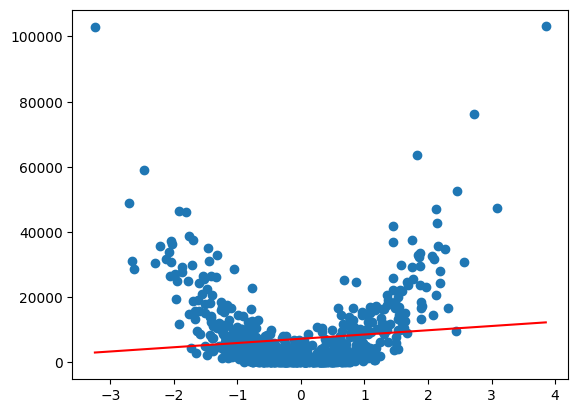

Train metrics:

R^2: 0.01
MAE: 7181.56
RMSE: 10802.78

Test metrics:

R^2: -0.05
MAE: 8121.31
RMSE: 13395.52


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercept (b0): {reg_lin.intercept_}")
print(f"Angular coefficient: {reg_lin.coef_}")

# ======================================

print("\nTrained model:")

x_plot = np.linspace(X.min(), X.max(), 1000)
y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*x_plot
plt.plot(x_plot, y_plot, color="red")

plt.scatter(X, y)
plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_train = reg_lin.predict(X_train)
print("Train metrics:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

y_pred_test = reg_lin.predict(X_test)
print("\nTest metrics:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Naturally, we have very bad metrics, given the current hypothesis:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Considering the data is approximately quadratic, it would make sense to choose a **quadratic hypothesis**. That is,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

When using linear models such as linear regression, it is important to remember that the model is linear in the parameters, not necessarily in the features.

That is, the square term we included **can be considered as a new linear feature**. To see this, just define $z \equiv x^2$, that we return to have a linear hypothesis, but now in two variables:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Another example: consider a linear hypothesis for a model with two features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

If we want to produce a quadratic model, we have to include the terms $x_1^2, x_2^2$ and also $x_1x_2$ (which is also quadratic), so that our hypothesis is:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

This does not mean that we are no longer using a linear model, but rather that we are using a **multiple linear regression** of 5 variables ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ and $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

Therefore, to create a quadratic model for our data, we would only need to create a new feature $z = x^2$, and pass only this new feature to the **simple** linear regression model. This is equivalent to using a hypothesis $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Intercept (b0): 934.4564684580109
Angular coefficient: [6661.31189456]

Train model:


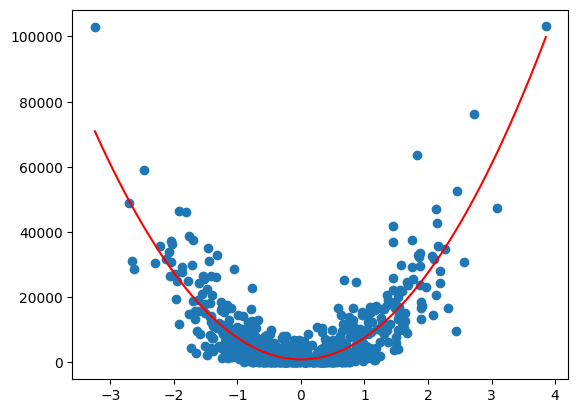

Train metrics:

R^2: 0.73
MAE: 3581.64
RMSE: 5636.74

Test metrics:

R^2: 0.73
MAE: 4326.26
RMSE: 6778.47


In [4]:
Z = X**2

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# ======================================

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

print(f"Intercept (b0): {reg_lin.intercept_}")
print(f"Angular coefficient: {reg_lin.coef_}")

# ======================================

print("\nTrain model:")

x_plot = np.linspace(X.min(), X.max(), 1000)
y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot**2)
plt.plot(x_plot, y_plot, color="red")

plt.scatter(X, y)
plt.show()

# ======================================

y_pred_train = reg_lin.predict(X_train)
print("Train metrics:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

y_pred_test = reg_lin.predict(X_test)
print("\nTest metrics:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

What if we want to use the most complete quadratic hypothesis, with both linear and quadratic terms? (That is, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

In [5]:
X_df = pd.DataFrame(X, columns=["X"])
X_df["Z"] = X_df["X"]**2
X_df.head()

,X,Z
0,-1.197878,1.434911
1,-1.024388,1.049370
2,-0.269407,0.072580
3,0.384065,0.147506
4,-0.107030,0.011455


Intercept (b0): 927.9689134531254
Angular coefficients (b1, ..., bn): [ -65.6131123  6667.88666831]

Train model:


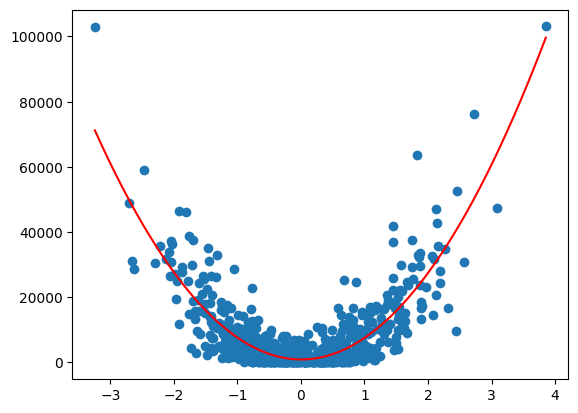

Train metrics:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Test metrics:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

print(f"Intercept (b0): {reg_lin.intercept_}")
print(f"Angular coefficients (b1, ..., bn): {reg_lin.coef_}")

# ======================================

print("\nTrain model:")

x_plot = np.linspace(X.min(), X.max(), 1000)
y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot) + reg_lin.coef_[1]*(x_plot**2)
plt.plot(x_plot, y_plot, color="red")

plt.scatter(X, y)
plt.show()

# ======================================

y_pred_train = reg_lin.predict(X_train)
print("Train metrics:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

y_pred_test = reg_lin.predict(X_test)
print("\nTest metrics:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

SKLearn has the [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) tool, which allows the creation of all polynomial combinations of features automatically.

The PolynomialFeatures is our first example of a **transformer** from sklearn - a method whose objective is to apply some **transformation** to the data. We will see several other examples of transformers during the course.

In particular, all transformers behave as if they were "estimators", in the sense that they must be "adjusted" to the data - so they also have the `.fit()` method - which adjusts the transformer to the data; in addition to the `.transform()` method, which effectively transforms the data. There is also `.fit_transform()`, which does both at the same time - but we will avoid using it, for reasons that will become clear in the near future.

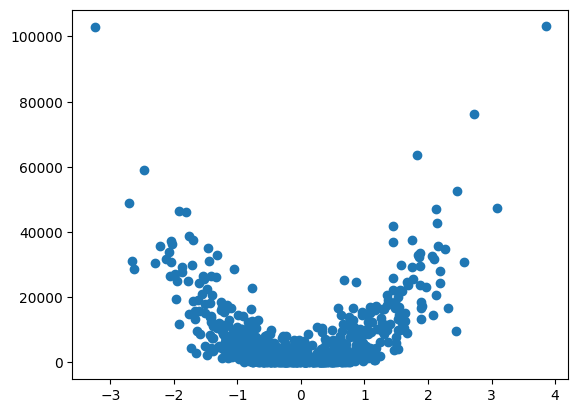

In [7]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [9]:
vars(pf)

{'degree': 2,
 'interaction_only': False,
 'include_bias': False,
 'order': 'C',
 'n_features_in_': 1,
 '_min_degree': 0,
 '_max_degree': 2,
 'n_output_features_': 2,
 '_n_out_full': 2}

In [10]:
pf.n_features_in_

1

In [11]:
pf.n_output_features_

2

In [12]:
pf.powers_

array([[1],
       [2]])

In [13]:
X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)

Original number of features: 1
Number of features in the transformed space: 2


Intercept (b0): 927.9689134531254
Angular coefficients (b1, ..., bn): [ -65.6131123  6667.88666831]

Train model:


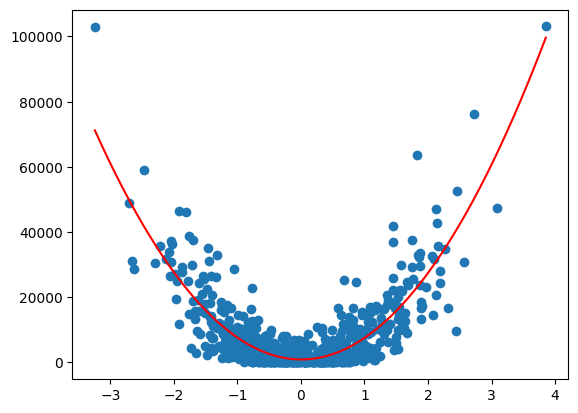

Train metrics:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Test metrics:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train)

print(f"Original number of features: {pf.n_features_in_}")
print(f"Number of features in the transformed space: {pf.n_output_features_}\n\n")

X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

print(f"Intercept (b0): {reg_lin.intercept_}")
print(f"Angular coefficients (b1, ..., bn): {reg_lin.coef_}")

# ======================================

print("\nTrain model:")

x_plot = np.linspace(X.min(), X.max(), 1000)
y_plot = reg_lin.intercept_

for n, b_n in enumerate(reg_lin.coef_):
    y_plot = y_plot + b_n*(x_plot**(n+1))
plt.plot(x_plot, y_plot, color="red")

plt.scatter(X, y)
plt.show()

# ======================================

y_pred_train = reg_lin.predict(X_train)
print("Train metrics:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

y_pred_test = reg_lin.predict(X_test)
print("\nTest metrics:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

# The curse of dimensionality

In [15]:
results = {"num_features" : [],
              "R^2_train" : [],
              "R^2_test" : [],
              "mae_train" : [],
              "mae_test" : []}

for degree in range(1, 16):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pf = PolynomialFeatures(degree=degree, include_bias=False)
    pf.fit(X_train)

    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    reg_lin = LinearRegression()
    reg_lin.fit(X_train, y_train)

    y_pred_train = reg_lin.predict(X_train)
    y_pred_test = reg_lin.predict(X_test)
    
    # ======================================
    
    results["num_features"].append(pf.n_output_features_)
    results["R^2_train"].append(r2_score(y_train, y_pred_train))
    results["R^2_test"].append(r2_score(y_test, y_pred_test))
    results["mae_train"].append(mean_absolute_error(y_train, y_pred_train))
    results["mae_test"].append(mean_absolute_error(y_test, y_pred_test))

In [16]:
df_results = pd.DataFrame(results)
df_results

,num_features,R^2_train,R^2_test,mae_train,mae_test
0,1,0.013668,-0.054221,7181.560933,8121.313244
1,2,0.731494,0.730499,3581.933778,4331.752527
2,3,0.731511,0.732158,3581.400263,4325.382292
3,4,0.731529,0.734497,3581.195690,4321.621979
4,5,0.731904,0.715263,3579.894828,4340.232799
5,6,0.732056,0.682749,3581.464832,4408.618829
6,7,0.737072,-0.005538,3544.409828,5078.571268
7,8,0.737163,-0.279381,3543.895806,5241.180968
8,9,0.737724,-2.133741,3538.829341,6027.308969
9,10,0.737877,-4.935238,3541.570521,6785.407158


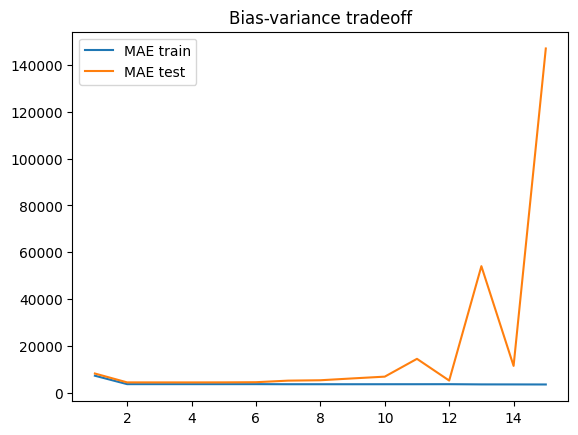

In [17]:
plt.title("Bias-variance tradeoff")

plt.plot(df_results["num_features"], df_results["mae_train"], label="MAE train")
plt.plot(df_results["num_features"], df_results["mae_test"], label="MAE test")

plt.legend()
plt.show()

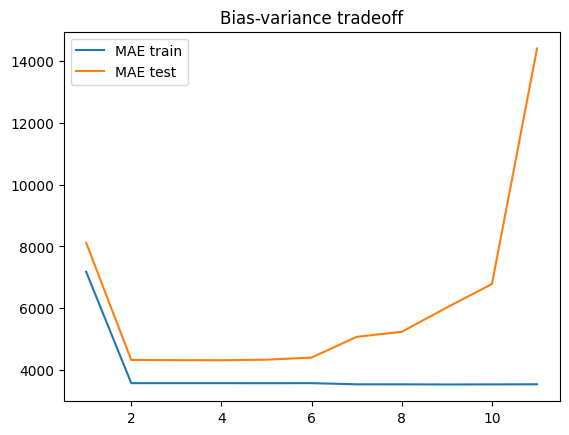

In [18]:
plt.title("Bias-variance tradeoff")

plt.plot(df_results[:11]["num_features"], df_results[:11]["mae_train"], label="MAE train")
plt.plot(df_results[:11]["num_features"], df_results[:11]["mae_test"], label="MAE test")

plt.legend()
plt.show()

The hypothesis here is:

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{16} x_{16}$$

That is, we have a mode **with too many parameters** or, in other words, **too complex**. With so many paramets, there are too many **degrees of freedom** so that the hypothesis can adjust to the particularities of the training data.

The outcome is self evident: we have an **overfitted** model, given the high number of features after the transformer -- and consider only quadratic features are being used, imagine if we were using higher degree features. One way to eliminate unnecessary features is to perform **feature selection** using **regularization** techniques.

# Regularization

Regularization aims to **reduce the complexity** of models, in order to avoid that the particularities of the train data (noise) is learned (that is, to avoid overfitting). Another way to put it is: **to reduce the hypothesis space**.

<img src=https://curso-r.github.io/main-intro-ml/slides/static/img/erro_treino_erro_teste.png width=500>

Regularization is performed with restrictions given the cost function optimization, which is the objective of the learning process, in order to determine the $\hat{\vec{b}}$. The restrictions determine if we have L1 (lasso) or L2 (ridge) regularization.

In SKLearn, it is possible to build a regularized linear regression with the respective classes:

- [L1 regularization/Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

- [L2 regularization/Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

> **IMPORTANT**: as regularization methods are based on the norm of the parameter vector, it is very important that the features are scaled so that the methods work well. That is because the scale of the features will influence the regularization applied to the respective parameter.

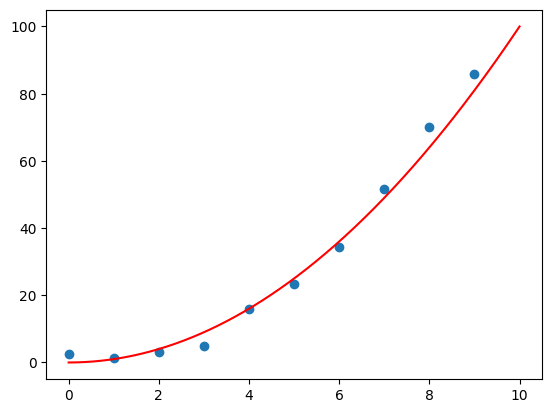

In [19]:
X = np.arange(10)
y = X**2

noise = np.random.normal(0, 3, 10)
y = y + noise

X = X.reshape(-1, 1)

x_plot = np.linspace(0, 10, 1000)
y_plot = x_plot**2

plt.scatter(X, y)
plt.plot(x_plot, y_plot, color="r")
plt.show();

In [20]:
def calc_y_plot(estimator, x_plot):
    y_plot = estimator.intercept_
    for n, b_n in enumerate(estimator.coef_):
        y_plot = y_plot + b_n*(x_plot**(n+1))
    return y_plot

In [21]:
from sklearn.preprocessing import MinMaxScaler

pf = PolynomialFeatures(degree=2, include_bias=False).fit(X)
X_transf = pf.transform(X)

mms = MinMaxScaler().fit(X_transf)
X_transf =  mms.transform(X_transf)
X_transf[:5]

array([[0.        , 0.        ],
       [0.11111111, 0.01234568],
       [0.22222222, 0.04938272],
       [0.33333333, 0.11111111],
       [0.44444444, 0.19753086]])

In [22]:
def reg_poly_plot(X, y, degree):
    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)
    X_transf = pf.transform(X)
    
    print(f"Original number of features: {pf.n_features_in_}")
    print(f"Number of features in the transformed space: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)
    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)

    # =====================================

    print("\nTrain model:")

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)
    y_plot = calc_y_plot(reg_lin, x_plot)

    plt.scatter(X_transf[:, 0], y)
    plt.plot(x_plot, y_plot, color="r")
    plt.show();

Original number of features: 1
Number of features in the transformed space: 1

Train model:


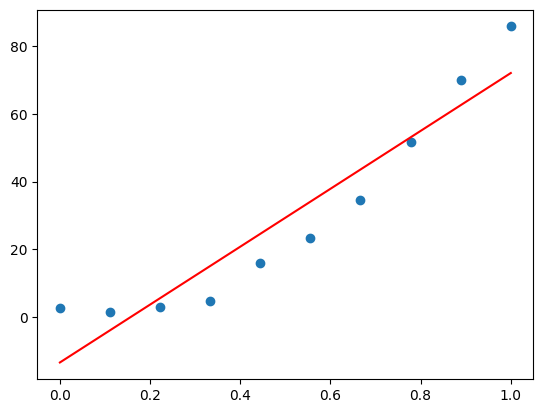

################################################################################

Original number of features: 1
Number of features in the transformed space: 2

Train model:


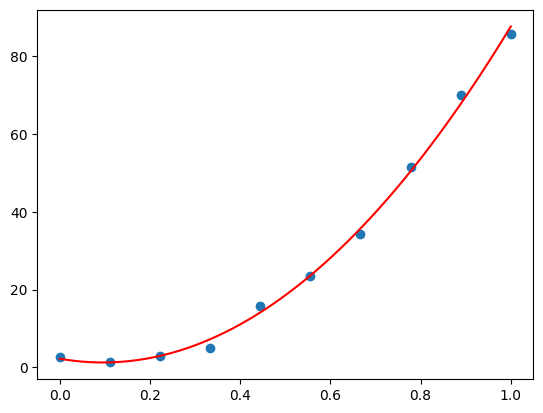

################################################################################

Original number of features: 1
Number of features in the transformed space: 3

Train model:


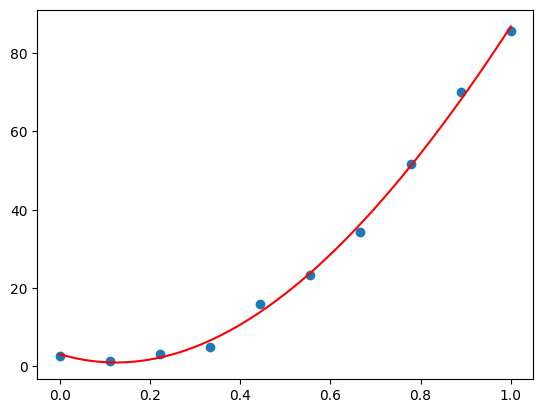

################################################################################

Original number of features: 1
Number of features in the transformed space: 4

Train model:


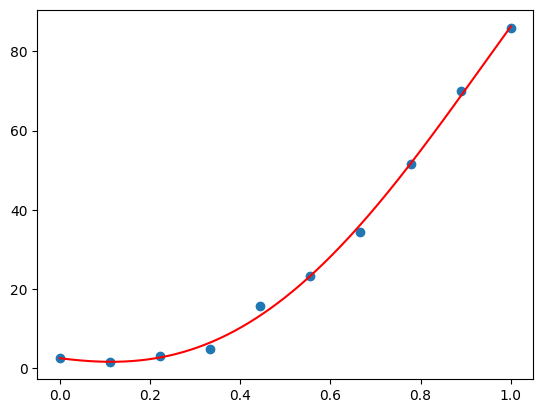

################################################################################

Original number of features: 1
Number of features in the transformed space: 5

Train model:


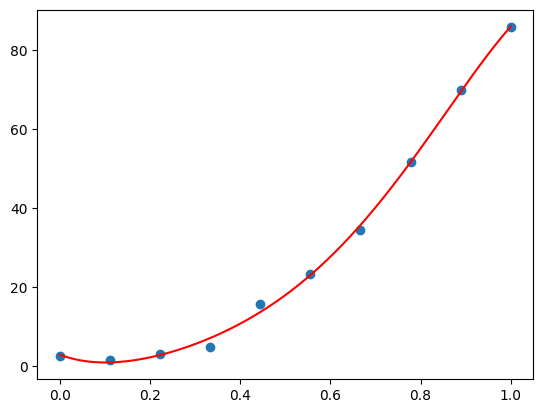

################################################################################

Original number of features: 1
Number of features in the transformed space: 6

Train model:


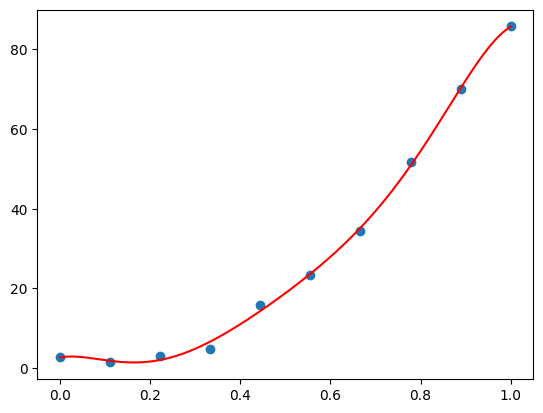

################################################################################

Original number of features: 1
Number of features in the transformed space: 7

Train model:


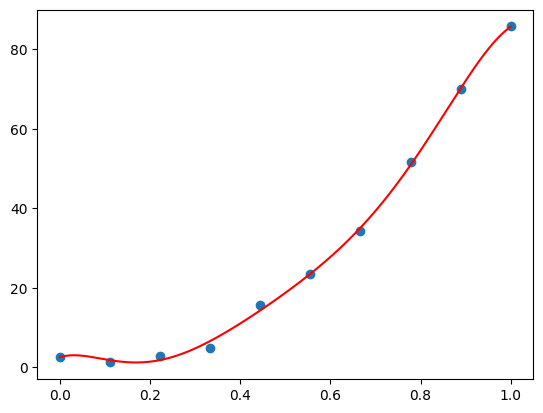

################################################################################

Original number of features: 1
Number of features in the transformed space: 8

Train model:


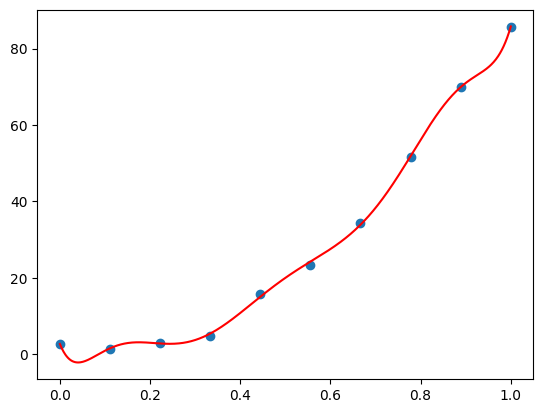

################################################################################

Original number of features: 1
Number of features in the transformed space: 9

Train model:


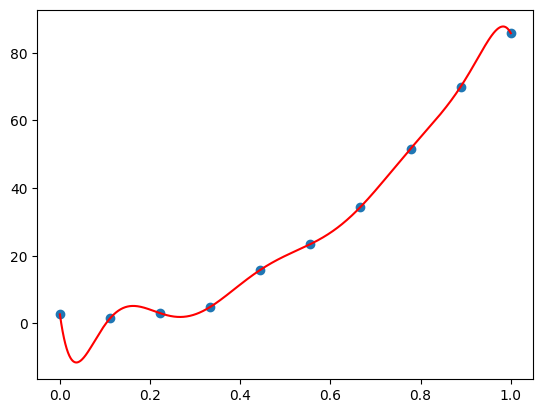

################################################################################

Original number of features: 1
Number of features in the transformed space: 10

Train model:


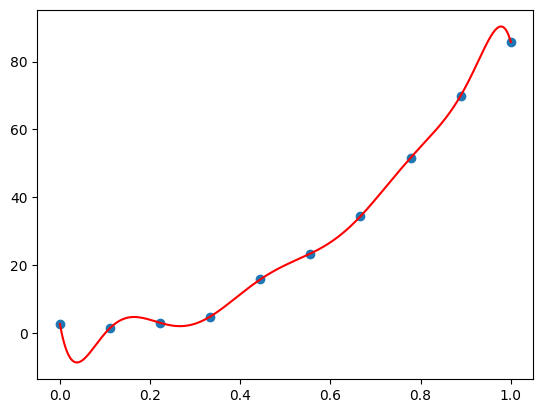

################################################################################



In [23]:
for degree in range(1, 11):
    reg_poly_plot(X, y, degree)
    print("#"*80)
    print()

Now, let's regularize the model.

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

np.set_printoptions(formatter={'float': lambda x: "{:.3f}".format(x)})

def reg_poly_regularized_plot(X, y, degree):
    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    print(f"Original number of features: {pf.n_features_in_}")
    print(f"Number of features in the transformed space: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)
    X_transf = mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)
    reg_elastic = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_transf, y)

    # =====================================

    print("\nTrain model:")
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    axs[0].scatter(X_transf[:, 0], y)
    axs[1].scatter(X_transf[:, 0], y)
    axs[2].scatter(X_transf[:, 0], y)

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot_reg_lin = calc_y_plot(reg_lin, x_plot)
    axs[0].plot(x_plot, y_plot_reg_lin, color="r", label="LinReg", ls=":")
    axs[1].plot(x_plot, y_plot_reg_lin, color="r", label="LinReg", ls=":")
    axs[2].plot(x_plot, y_plot_reg_lin, color="r", label="LinReg", ls=":")
    
    y_plot_reg_l1 = calc_y_plot(reg_l1, x_plot)
    axs[0].plot(x_plot, y_plot_reg_l1, color="orange", label="L1")
    
    y_plot_reg_l2 = calc_y_plot(reg_l2, x_plot)
    axs[1].plot(x_plot, y_plot_reg_l2, color="green", label="L2")

    y_plot_reg_elastic = calc_y_plot(reg_elastic, x_plot)
    axs[2].plot(x_plot, y_plot_reg_elastic, color="purple", label="Elastic")
    
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    plt.show();

Original number of features: 1
Number of features in the transformed space: 1

Train model:


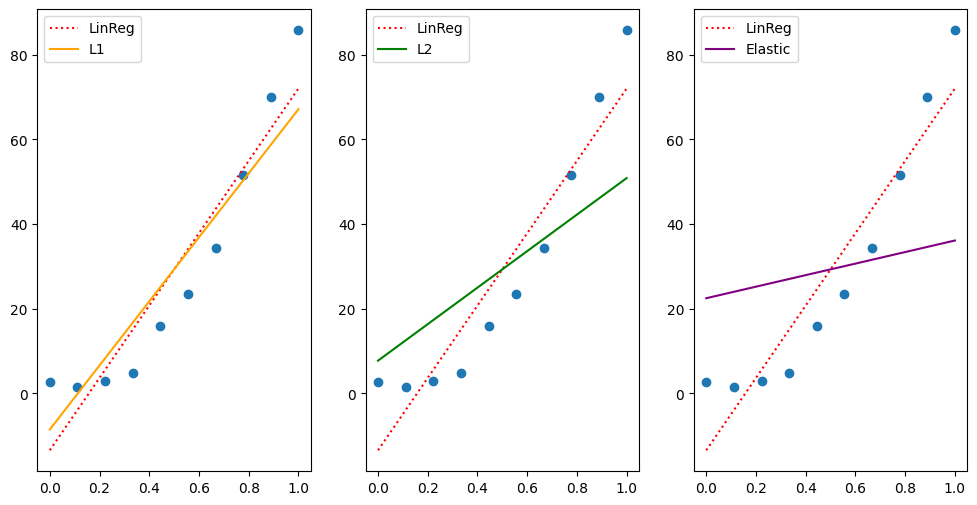

################################################################################

Original number of features: 1
Number of features in the transformed space: 2

Train model:


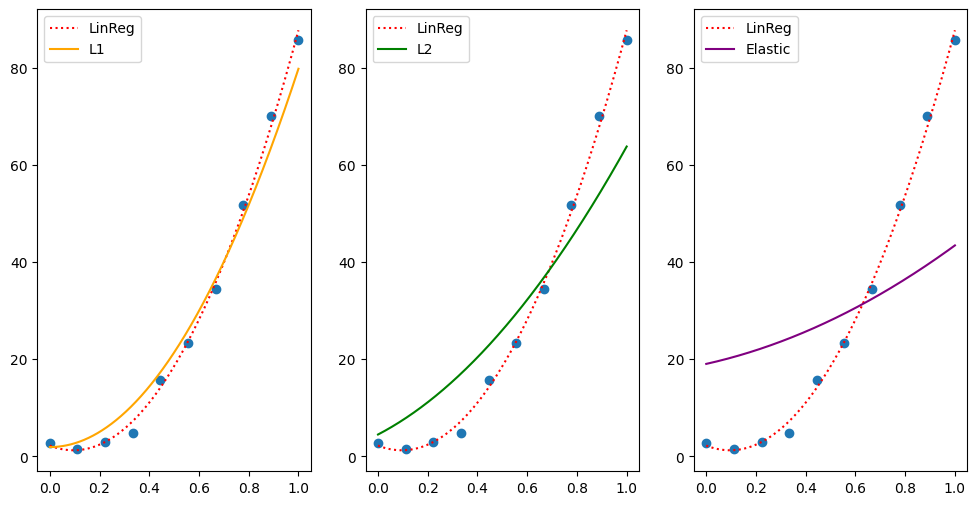

################################################################################

Original number of features: 1
Number of features in the transformed space: 3

Train model:


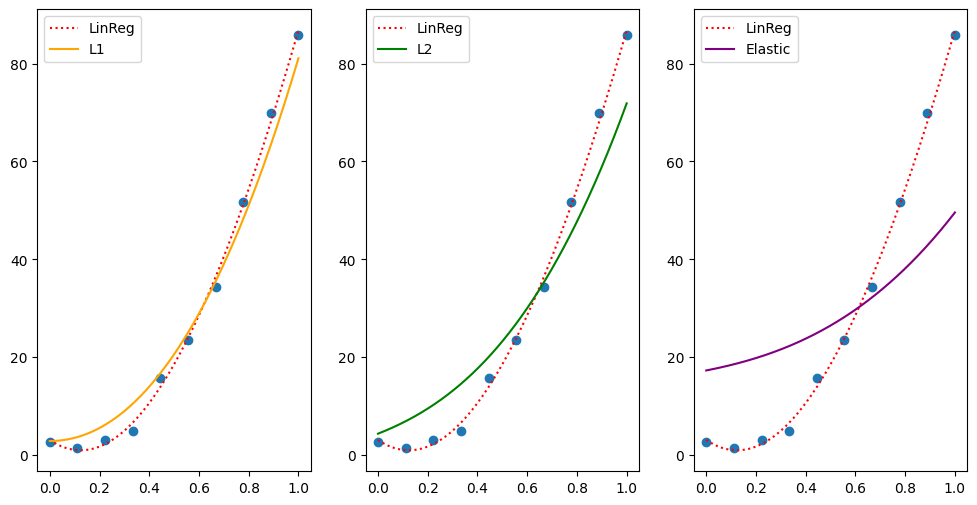

################################################################################

Original number of features: 1
Number of features in the transformed space: 4

Train model:


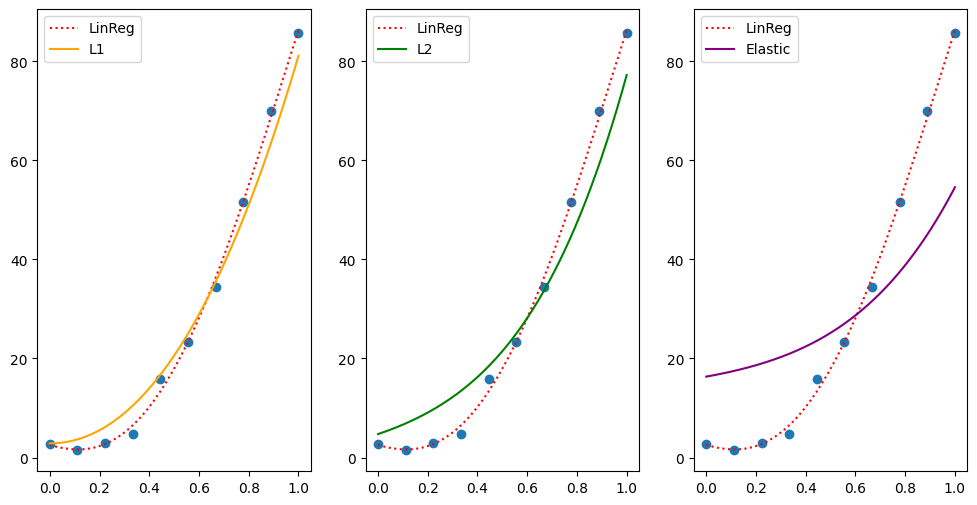

################################################################################

Original number of features: 1
Number of features in the transformed space: 5

Train model:


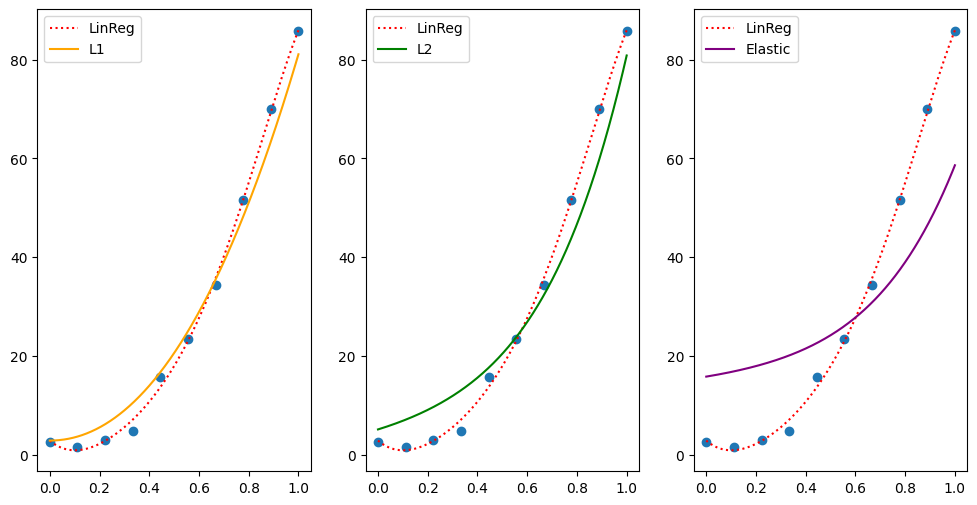

################################################################################

Original number of features: 1
Number of features in the transformed space: 6

Train model:


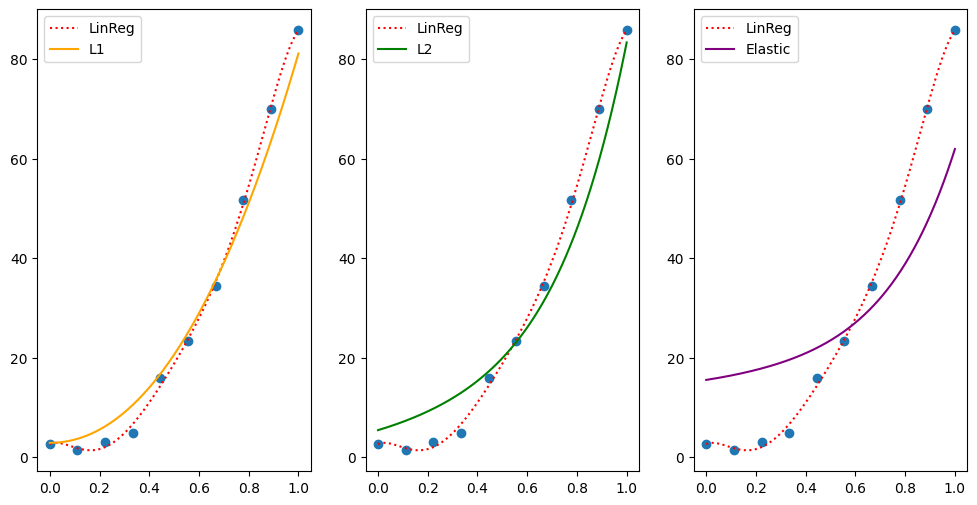

################################################################################

Original number of features: 1
Number of features in the transformed space: 7

Train model:


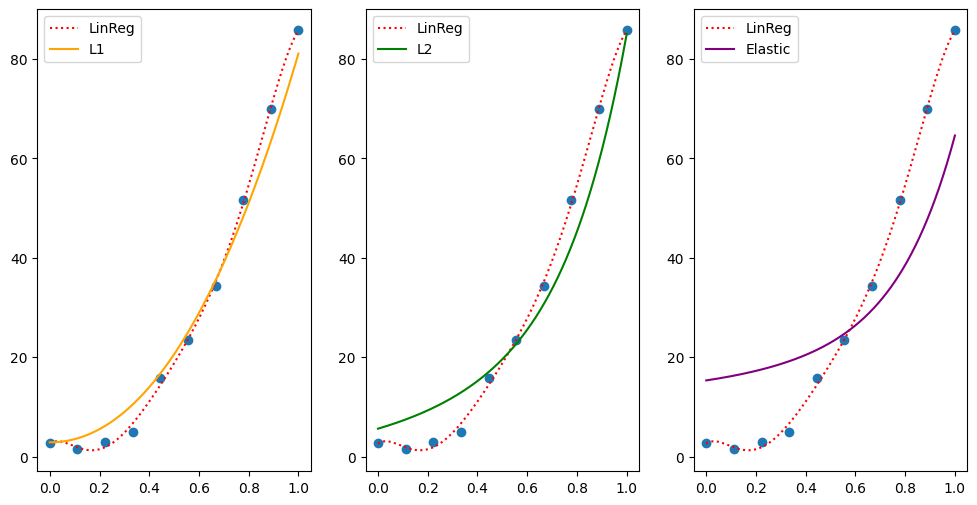

################################################################################

Original number of features: 1
Number of features in the transformed space: 8

Train model:


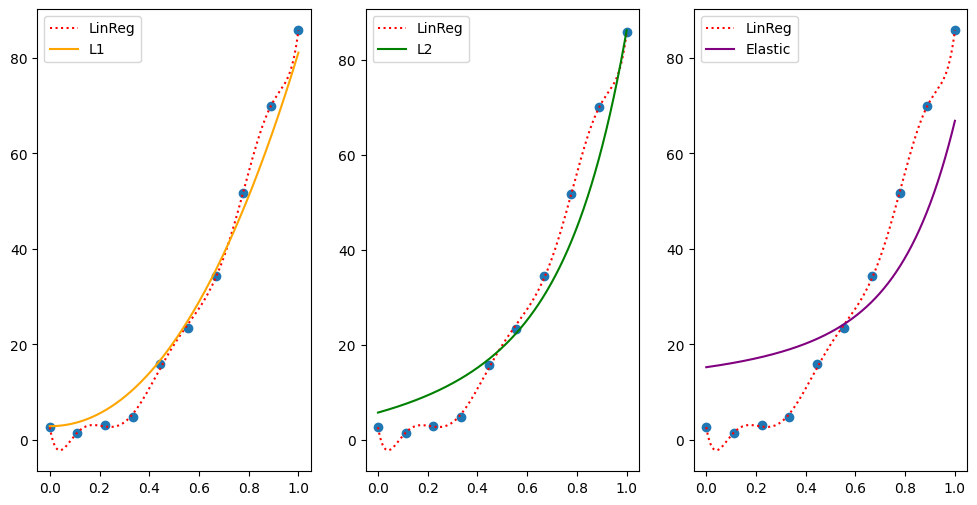

################################################################################

Original number of features: 1
Number of features in the transformed space: 9

Train model:


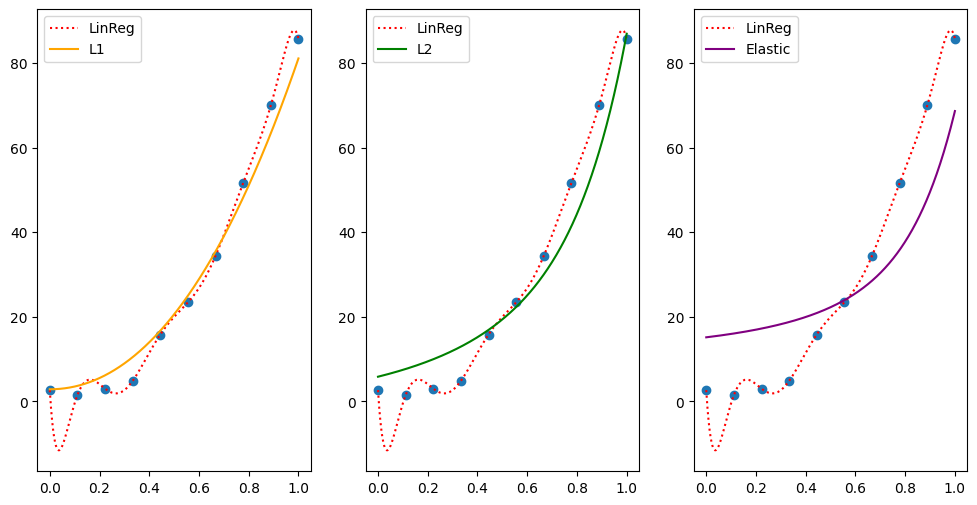

################################################################################

Original number of features: 1
Number of features in the transformed space: 10

Train model:


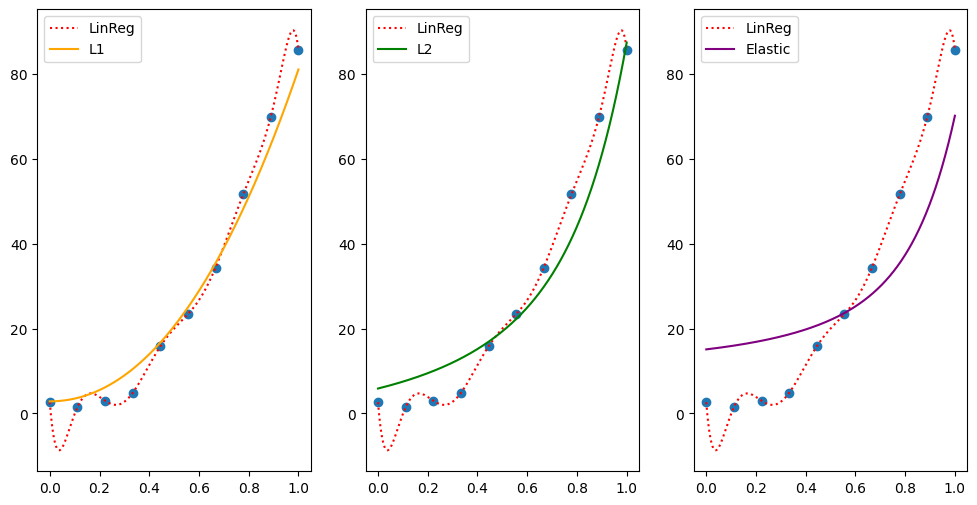

################################################################################



In [25]:
for degree in range(1, 11):
    
    reg_poly_regularized_plot(X, y, degree)
    
    print("#"*80)
    print()